# Just for fun

In [ ]:
import sympy as sp # type: ignore
sp.init_printing()

## dirichlet_subdomain
We solve the Dirichlet problem
$$
\nabla \cdot (\sigma \nabla u)  = 1 \quad x\in\Omega,\quad u = 0 \quad x\in\partial\Omega
$$
in the two-dimensional domain $\Omega$ determined by the parametric curve
$$
t \mapsto (\cos t, \sin t+ \frac{\sin^2 t}{2})
$$
for $t\in[0,2\pi)$. We use `Gmsh` to generate the mesh. The coefficient $\sigma$ takes the value $\sigma=1$ on the subdomain $\Omega_0 \subset \Omega$, and $\sigma = 4$ on $\Omega \setminus \Omega_0$. The subdomain $\Omega_0$ is a ball of radius $\sqrt{0.2}$ and center $(0,0)$. 

## predefined_subdomain
We solve the same problem that in `dirichlet_subdomain` but with a subdomain $\Omega_0$ defined when $\Omega$ is generated. More precisely, the implicit equation
$$
2(x^2 + y^2)^2 = x^3 + y^3
$$
defines the boundary of the subdomain $\Omega_0$. This approach yields a more exact approximate solution.

## transport_equation
We solve the transport equation
$$
\phi_t (x,y,t)+\theta(x,y)\cdot\nabla\phi(x,y,t)=f(x,y)
$$
for $t\in[0,T]$ and $x\in\Omega$, with $\Omega$ being a two-dimensional ball. The vector field $\theta$ is defined by $\theta(x,y)=(-y,x)$. Thus, $\theta \cdot n =0$ on $\partial\Omega$. The _Backward Euler_ method is used to approximate the partial derivative with respect to $t$. The function$$\phi(x,y,t)=1 + x^2 + \alpha y^2 + \beta t$$is used to verify the numerical method.

In [2]:
x, y, alpha, beta, t = sp.symbols('x y alpha beta t')

# test function
phi = 1 + x**2 + alpha * y**2 + beta * t

phi_t = sp.diff(phi, t)
phi_x = sp.diff(phi, x)
phi_y = sp.diff(phi, y)

# equation \phi + \theta \cdot \nabla \phi
# \theta (x,y) = (-y,x)
f = phi_t + (-y)*phi_x + x*phi_y
f

## eit_continuous_md

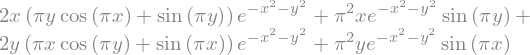

In [3]:
x, y = sp.symbols('x y')
u = y*sp.sin(sp.pi*x) + x*sp.sin(sp.pi*y)
sigma = sp.exp(-x**2-y**2)
du = [sp.diff(u, x), sp.diff(u, y)]
display(du)
S = - (sp.diff(sigma*du[0],x)+sp.diff(sigma*du[1],y))
display(S)

## boundary_markers

This code marks some parts of the boundary $\partial \Omega$ of a two dimensional domain determined by a set of vertices. We use the marks to integrate over such parts. Each mark identify a set of facets of $\Omega$ (recall that the domain is a polygonal domain). So, the nodes defined in the facets are also marked. The integration is verified with the result given by the function `quad` of `scipy`.

In [4]:
import scipy.integrate as integrate
import numpy as np
from sympy.utilities.lambdify import lambdify

t = sp.symbols('t')
rx = sp.cos(t)
ry = sp.sin(t)+ ((sp.sin(t))**2)/2
norm_r = sp.sqrt(sp.diff(rx, t)**2 + sp.diff(ry, t)**2)
fr = rx + ry
arg = lambdify(t, fr*norm_r)
print(integrate.quad(lambda t: arg(t), 0, np.pi/4.))
fr = 2*rx**2 + rx*ry
arg = lambdify(t, fr*norm_r)
print(integrate.quad(lambda t: arg(t), np.pi, np.pi+ np.pi/4.))


(1.3983824166381065, 1.5525163561825943e-14)
(1.1202805088590209, 2.732174248949788e-12)


## periodic_laplacian

We solve the partial differential equation
$$
\Delta u  = 0 \quad \text{in }\Omega
$$
with Dirichlet boundary conditions
$$
u = 0 \quad \text{on }\Gamma_{top}, \quad u = 1 \quad \text{on }\Gamma_{bot}
$$
and periodic boundary conditions
$$
u(0,y)=u(1,y),\;\partial_{x} u(0,y)=\partial_{x}u(1,y) \quad 0\leq y\leq 1
$$
The domain $\Omega$ is defined by
$$
\Omega = \left\{(x,y)\mid 0 \leq x \leq 1,\;0 \leq y \leq f(x) \right\}
$$
where $f$ is a function such that $f(0)=f(1)=1$ and $f^\prime(0)=f^\prime(1)$.

## periodic_interpolation

We address the problem outlined in `periodic_laplacian` by interpolating the top boundary of $\Omega$ with a function of the form
$$
    f(x) = \sum_{i} a_i \phi_i(x),
$$
where the functions $\phi_i$ are called _basis functions_. We consider both piecewise linear and radial basis functions. By imposing the boundary conditions, we derive a system of equations that the coefficients $a_i$'s must satisfy.

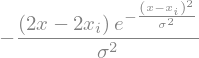

In [ ]:
x, x_i, sigma = sp.symbols('x x_i sigma')
# basis function
phi = sp.exp(-((x-x_i)/sigma)**2)
phi_t = sp.diff(phi, x)
phi_t

> alpha coefficients: [-1.63229538 -1.77105231 -1.51374769 -0.91650462]
> beta coefficients: [-0.91650462 -1.51374769 -1.77105231 -1.63229538]
> periodic coefficients: [-0.29501039  1.24752946  0.29655651 -3.18099763]
> Values at the boundary:
1.0438650233844688 1.0438650233844688
0.524834914756602 0.5248349147566023


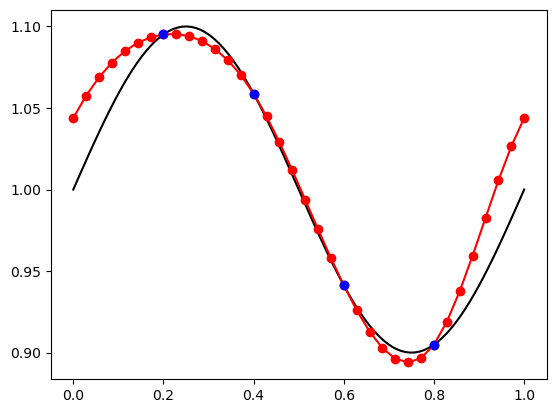

X_ChangeProperty: BadValue (integer parameter out of range for operation) 0x0


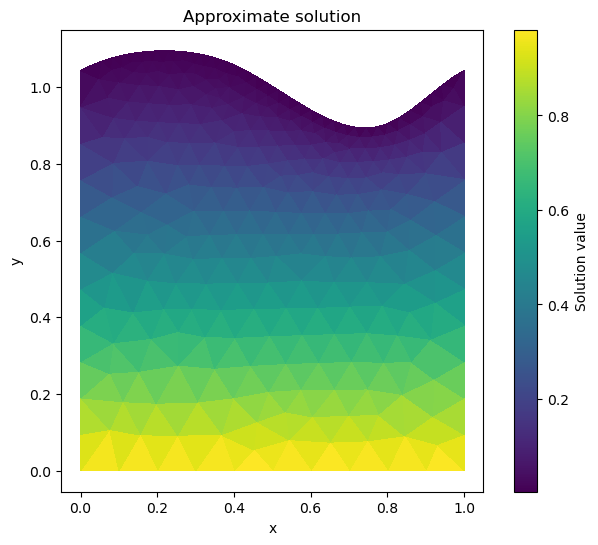

In [1]:
from periodic_interpolation import test
test()